In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [285]:
#imports dataset into a dataframe
data = pd.read_csv(r'C:\Users\RICHITHA REDDY\Desktop\shopping_behavior_updated.csv')

In [286]:
#deletes duplicate values
data.drop_duplicates()

,Age,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Clothing,53,L,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,L,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,S,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Footwear,90,M,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Clothing,49,M,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,L,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Accessories,49,L,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Accessories,33,L,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Footwear,77,S,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [287]:
# Drop rows with any NaN values from the entire DataFrame
data.dropna(inplace=True)
missing_values = data.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Size                      0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [288]:
#counts rows and columns
data.shape

(3900, 14)

In [289]:
#displaying all the missing values present in the dataset
print("\nData type:")
print(data.info())


Data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   object 
 5   Season                  3900 non-null   object 
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   object 
 8   Shipping Type           3900 non-null   object 
 9   Discount Applied        3900 non-null   object 
 10  Promo Code Used         3900 non-null   object 
 11  Previous Purchases      3900 non-null   int64  
 12  Payment Method          3900 non-null   object 
 13  Frequency of Purchases  3900 non-null   object 
dtypes: float64(1), int64(3), obj

In [290]:
#complete statistics about the dataset
print(data.describe())

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.858974       3.749949           25.351538
std      15.207589              23.968574       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             210.000000       5.000000           50.000000


## Handling Outliers 

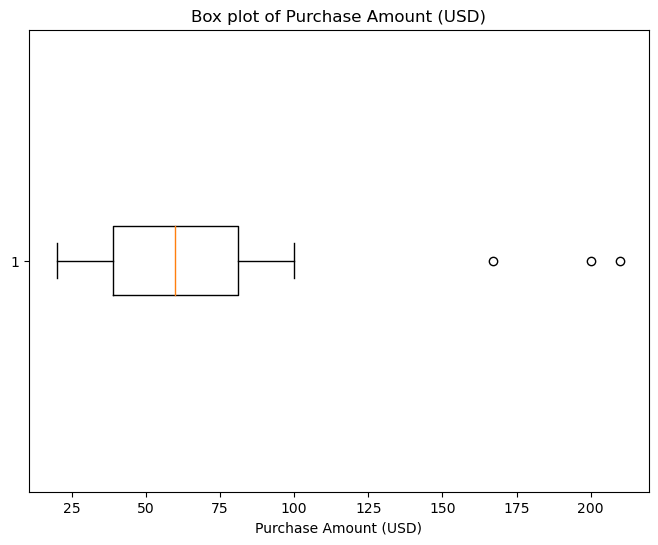

In [291]:
#Identifying outliers
import matplotlib.pyplot as plt

# Plot a box plot to visualize the outliers 
plt.figure(figsize=(8, 6))
plt.boxplot(data['Purchase Amount (USD)'], vert=False)
plt.xlabel('Purchase Amount (USD)')
plt.title('Box plot of Purchase Amount (USD)')
plt.show()


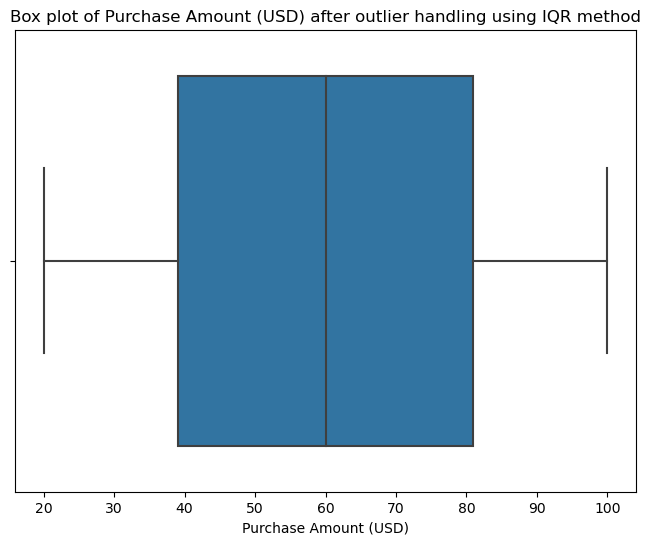

In [292]:
#handling outlierss
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function for outlier detection using IQR
def handle_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Handle outliers in the 'Purchase Amount (USD)' column using IQR method
data['Purchase Amount (USD)'] = handle_outliers_iqr(data['Purchase Amount (USD)'])

# Plot a box plot to visualize the distribution of Purchase Amount (USD) after outlier handling
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Purchase Amount (USD)'], orient='h')
plt.xlabel('Purchase Amount (USD)')
plt.title('Box plot of Purchase Amount (USD) after outlier handling using IQR method')
plt.show()


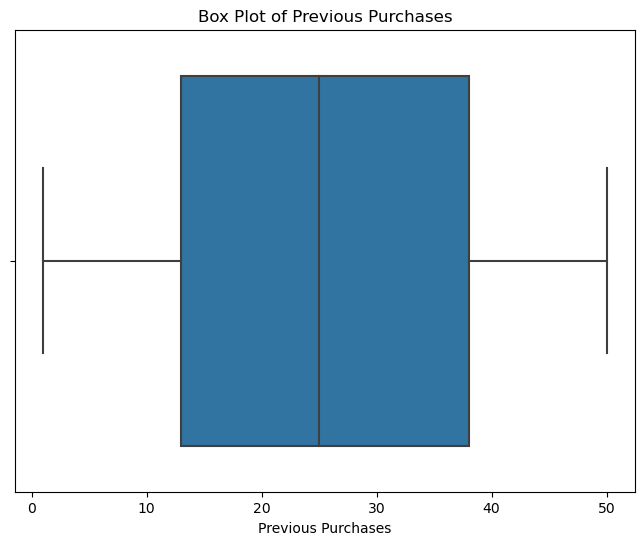

In [293]:
# Box plot for Previous Purchases to find outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Previous Purchases'])
plt.title('Box Plot of Previous Purchases')
plt.xlabel('Previous Purchases')
plt.show()


## Data Visualization

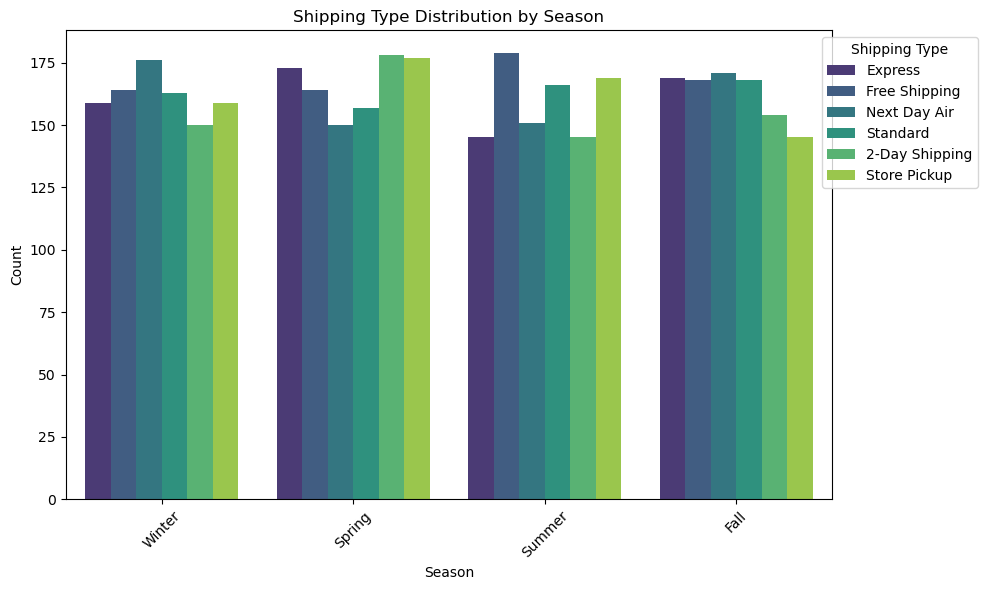

In [294]:
# Create the bar plot on shipping type distribution by season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Shipping Type', data=data, palette='viridis')

# Add labels and title
plt.title('Shipping Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend with labels
plt.legend(title='Shipping Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Show the plot
plt.show()


In [295]:
# Calculate counts of shipping types in different seasons
season_shipping_counts = data.groupby(['Season', 'Shipping Type']).size().unstack()

# Print the counts
print("Count of Shipping Types in Different Seasons:")
print(season_shipping_counts)


Count of Shipping Types in Different Seasons:
Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                      154      169            168           171       168   
Spring                    178      173            164           150       157   
Summer                    145      145            179           151       166   
Winter                    150      159            164           176       163   

Shipping Type  Store Pickup  
Season                       
Fall                    145  
Spring                  177  
Summer                  169  
Winter                  159  


In [296]:
# Define age groups
age_groups = {
    'Young Adult': (18, 35),
    'Adult': (36, 50),
    'Middle-Aged': (51, 65),
    'Senior': (65, float('inf'))  # 'inf' represents infinity for ages above 65
}

# Function to categorize age
def categorize_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'Unknown'

# Apply categorization to the 'Age' column
data['Age Group'] = data['Age'].apply(categorize_age)

# Drop the 'Age' column
data.drop(columns=['Age'], inplace=True)

# Encode the 'Age Group' column with values 0, 1, 2, 3
age_group_encoding = {
    'Young Adult': 0,
    'Adult': 1,
    'Middle-Aged': 2,
    'Senior': 3
}

data['Age Group Encoded'] = data['Age Group'].map(age_group_encoding)

# Display the first few rows to verify the changes
print(data[['Age Group', 'Age Group Encoded']].head())

# Define the threshold value separating "High" and "Low" tiers
threshold = 50

# Create a new column 'Purchase Amount Tier' based on the threshold
data['Purchase Amount Tier'] = np.where(data['Purchase Amount (USD)'] >= threshold, 1, 0)


     Age Group  Age Group Encoded
0  Middle-Aged                  2
1  Young Adult                  0
2        Adult                  1
3  Young Adult                  0
4        Adult                  1


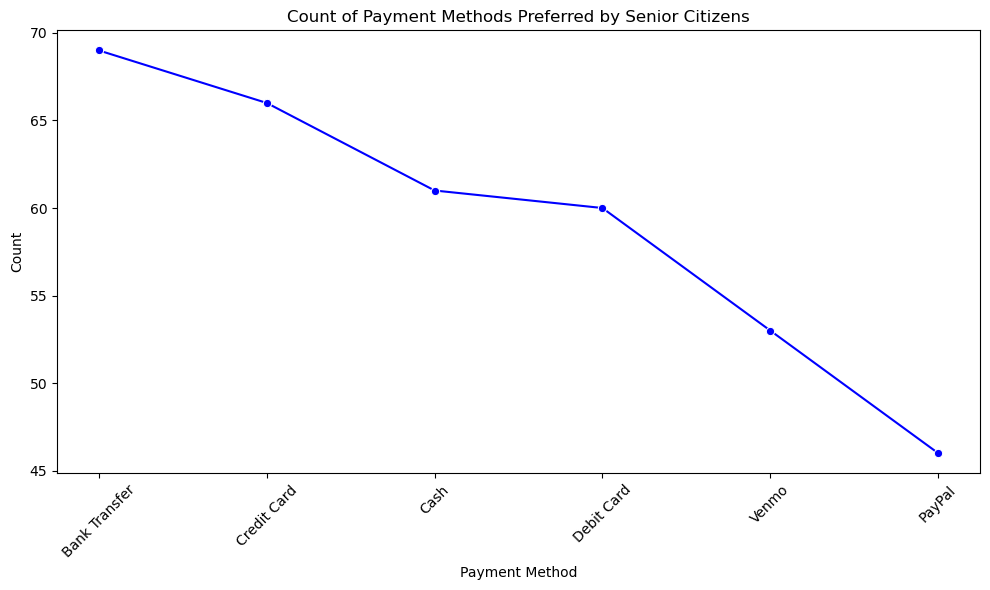

In [297]:
#count plot of payment methods for senior citizens
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for senior citizens
senior_data = data[data['Age Group'] == 'Senior']

# Group by 'Payment Method' and calculate the count of each payment method for senior citizens
payment_method_counts = senior_data['Payment Method'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Count']

# Sort the dataframe by count in descending order
payment_method_counts = payment_method_counts.sort_values(by='Count', ascending=False)

# Create a line graph to visualize the count of payment methods preferred by senior citizens
plt.figure(figsize=(10, 6))
sns.lineplot(x='Payment Method', y='Count', data=payment_method_counts, marker='o', color='blue')
plt.title('Count of Payment Methods Preferred by Senior Citizens')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


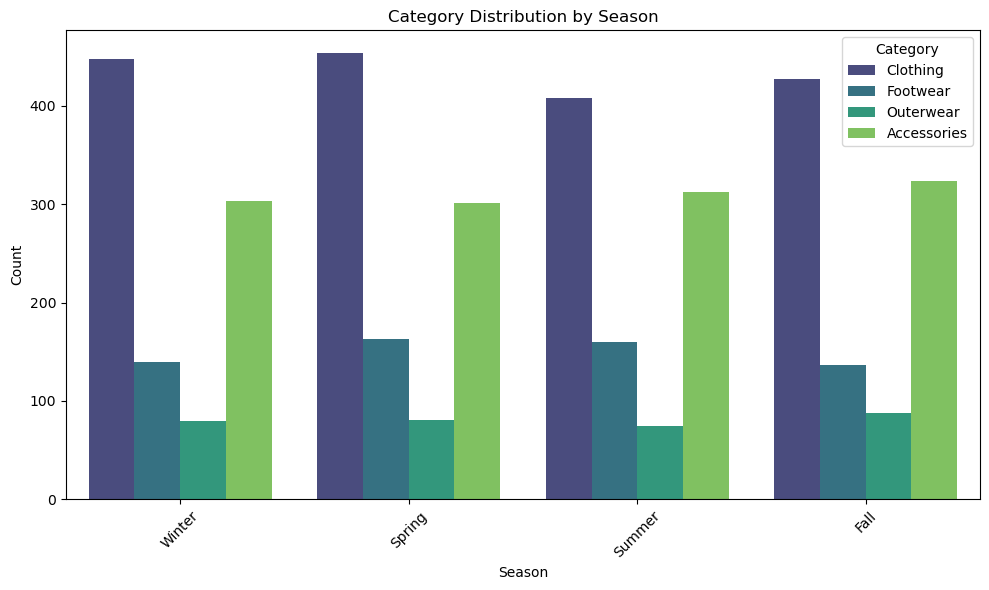

In [298]:
#Category Distribution by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Category', data=data, palette='viridis')
plt.title('Category Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()


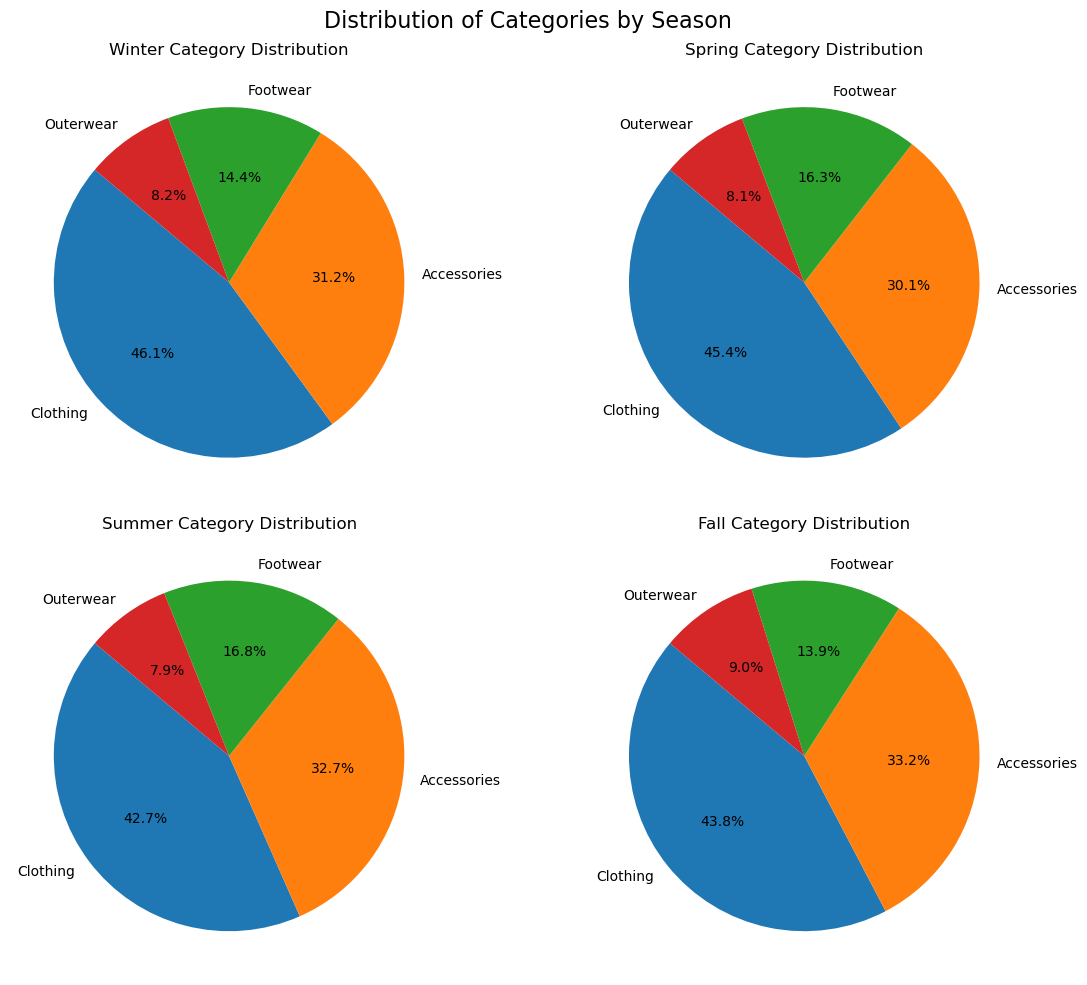

In [299]:
#Distribution of Categories by Season 
import seaborn as sns
import matplotlib.pyplot as plt

# Define the seasons and categories
seasons = data['Season'].unique()
categories = data['Category'].unique()

# Create subplots for each season
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = data[data['Season'] == season]
    
    # Calculate counts for each category in the current season
    category_counts = season_data['Category'].value_counts()
    
    # Plot the pie chart for the current season
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{season} Category Distribution')
fig.suptitle('Distribution of Categories by Season', fontsize=16)
plt.tight_layout()
plt.show()


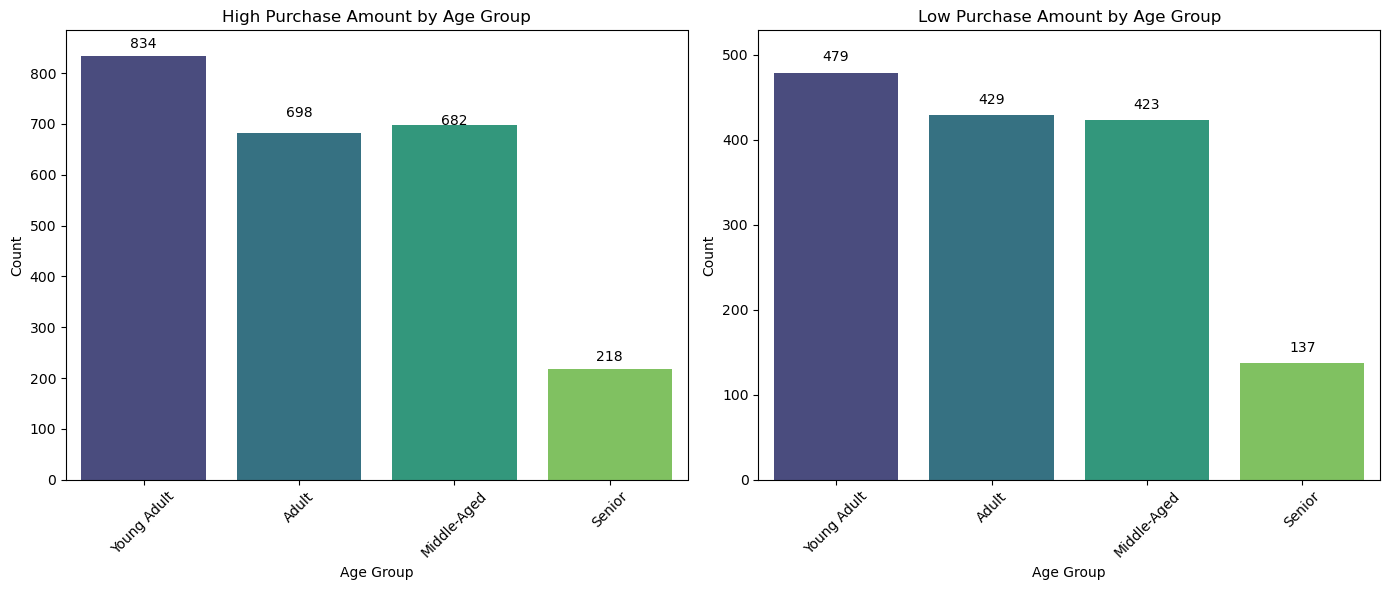

In [300]:
#Purchase count in different age groups
# Filter the data for High and Low purchase amounts
data_high = data[data['Purchase Amount Tier'] == 1]
data_low = data[data['Purchase Amount Tier'] == 0]

# Create separate bar plots for High and Low purchase amounts
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Age Group', data=data_high, palette='viridis', order=['Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
plt.title('High Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(data_high['Age Group'].value_counts()) + 50)

# Label bars with 'High'
for i, value in enumerate(data_high['Age Group'].value_counts().values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.countplot(x='Age Group', data=data_low, palette='viridis', order=['Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
plt.title('Low Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(data_low['Age Group'].value_counts()) + 50)

# Label bars with 'Low'
for i, value in enumerate(data_low['Age Group'].value_counts().values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


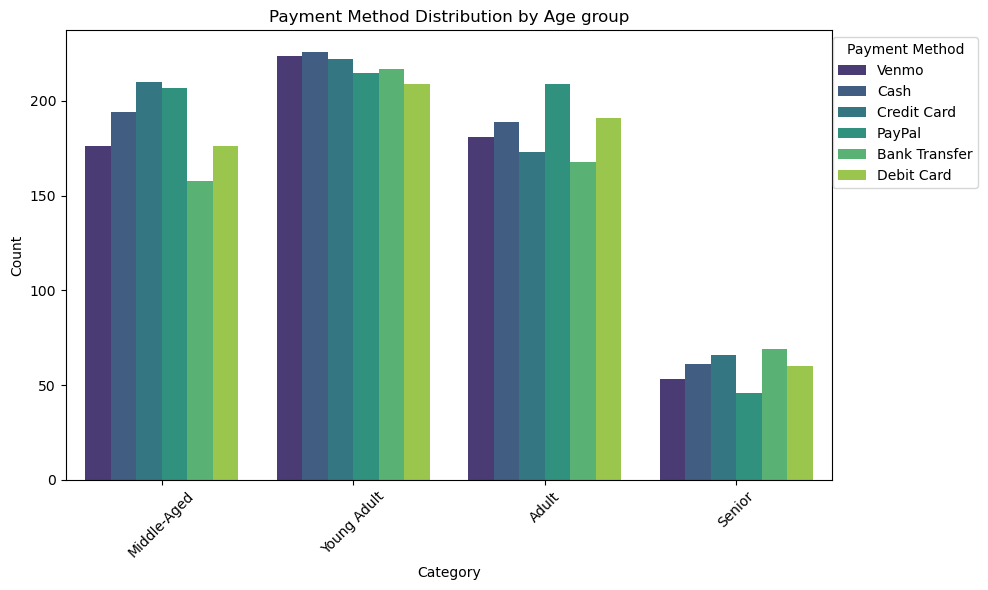

In [301]:
#ayment Method Distribution by Age group
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Age group')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


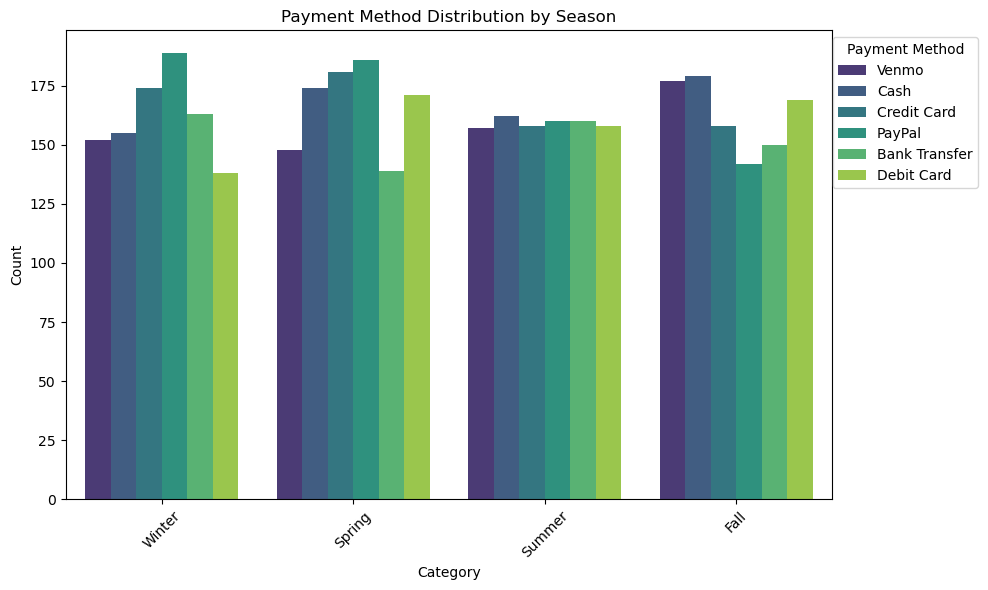

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Season')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


In [264]:
# Define the threshold value separating "High" and "Low" tiers
threshold = 50

# Create a new column 'Purchase Amount Tier' based on the threshold
data['Purchase Amount Tier'] = np.where(data['Purchase Amount (USD)'] >= threshold, 1, 0)

# Display the counts of each tier
print(data['Purchase Amount Tier'].value_counts())


1    2432
0    1468
Name: Purchase Amount Tier, dtype: int64


<Figure size 1000x600 with 0 Axes>

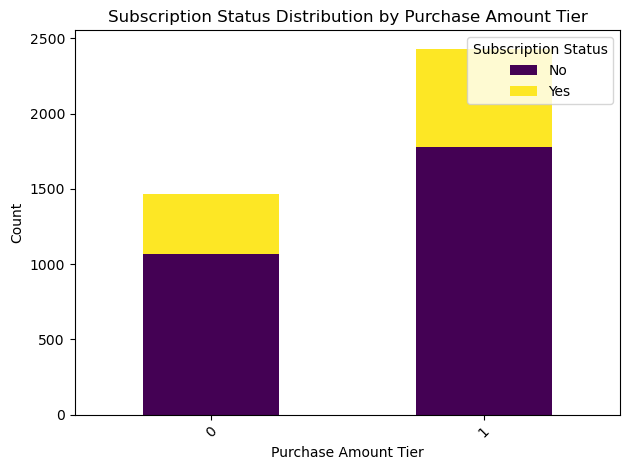

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to aggregate the data
pivot_data = data.pivot_table(index='Purchase Amount Tier', columns='Subscription Status', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.title('Subscription Status Distribution by Purchase Amount Tier')
plt.xlabel('Purchase Amount Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Subscription Status', labels=['No', 'Yes'], loc='upper right')  # Adjust legend labels
plt.tight_layout()

# Show the plot
plt.show()


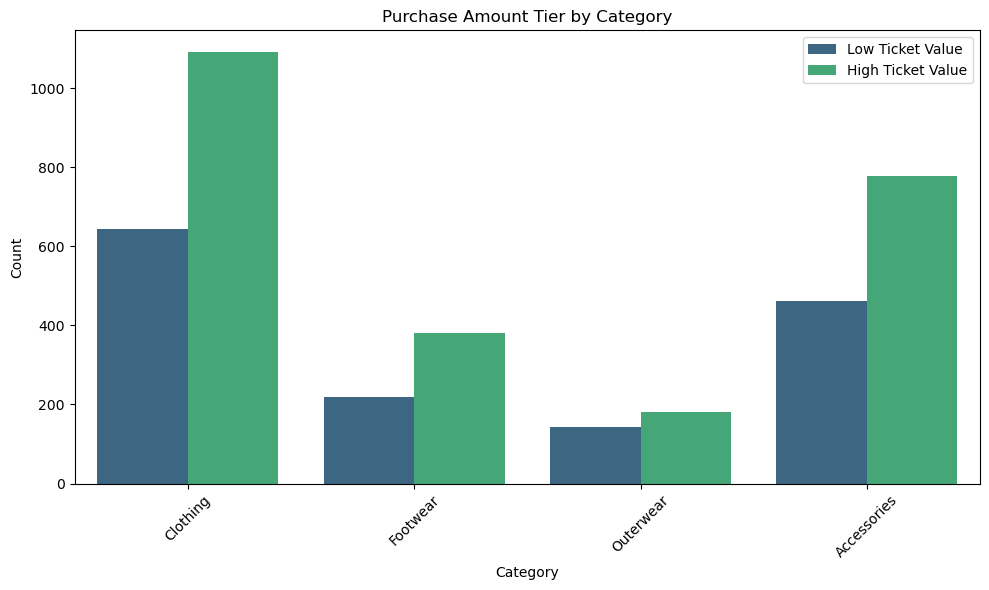

In [266]:
#Purchase Amount Tie by category
import seaborn as sns
import matplotlib.pyplot as plt

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Purchase Amount Tier', data=data, palette='viridis')
plt.title('Purchase Amount Tier by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Purchase Amount Tier', loc='upper right')

# Customize legend labels
legend_labels = ['Low Ticket Value', 'High Ticket Value']
plt.legend(legend_labels)

plt.tight_layout()
plt.show()



In [267]:
# Calculate counts of shipping types in different seasons
season_shipping_counts = data.groupby(['Season', 'Shipping Type']).size().unstack()

# Print the counts
print("Count of Shipping Types in Different Seasons:")
print(season_shipping_counts)


Count of Shipping Types in Different Seasons:
Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                      154      169            168           171       168   
Spring                    178      173            164           150       157   
Summer                    145      145            179           151       166   
Winter                    150      159            164           176       163   

Shipping Type  Store Pickup  
Season                       
Fall                    145  
Spring                  177  
Summer                  169  
Winter                  159  


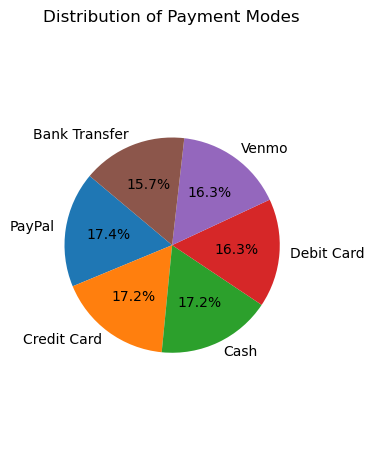

In [268]:
#distribution of payement Methods
import matplotlib.pyplot as plt

# Count the frequency of purchases
frequency_counts = data['Frequency of Purchases'].value_counts()

# Count the frequency of payment modes
payment_mode_counts = data['Payment Method'].value_counts()

# Create a pie chart for payment modes
plt.subplot(1, 2, 2)
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Modes')
plt.axis('equal')

plt.tight_layout()
plt.show()


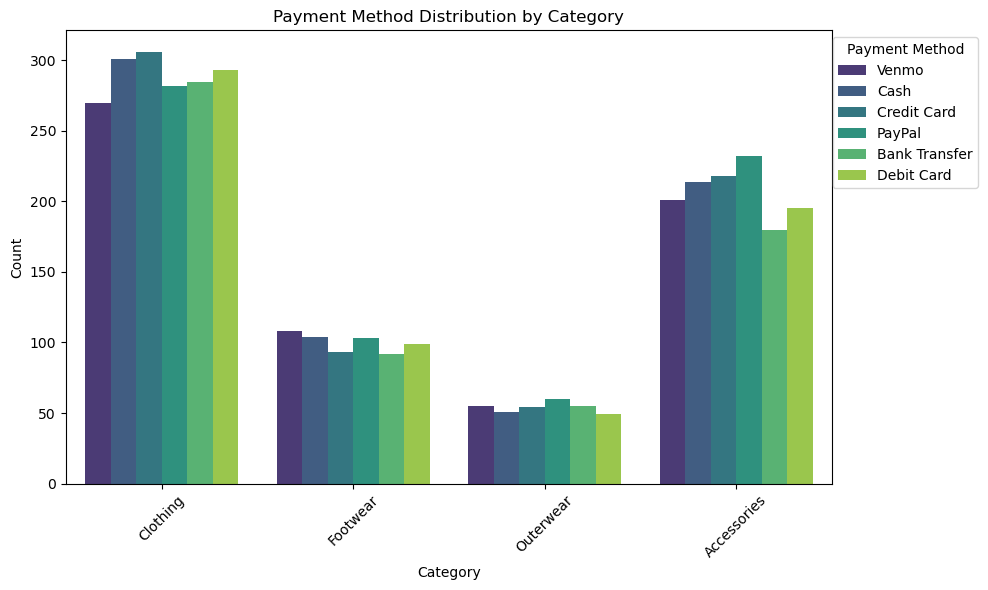

In [302]:
#Payment Method Distribution by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

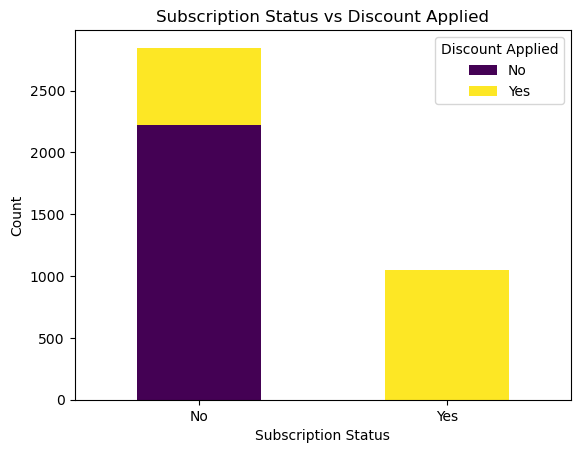

In [303]:

# Create a pivot table for subscribed users vs discount applies
pivot_data = data.pivot_table(index='Subscription Status', columns='Discount Applied', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.title('Subscription Status vs Discount Applied')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Discount Applied', loc='upper right')

# Show the plot
plt.show()


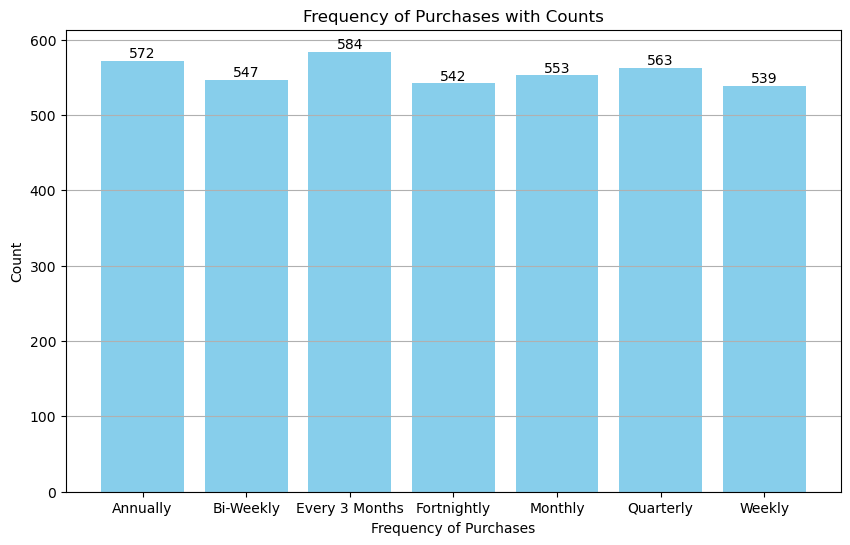

In [304]:
# graph for Frequency of Purchases

purchase_counts = data['Frequency of Purchases'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for frequency of purchases
plt.bar(purchase_counts.index, purchase_counts.values, color='skyblue')

# Adding counts above each bar
for i, count in enumerate(purchase_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases with Counts')

# Displaying the plot
plt.grid(axis='y')
plt.show()


In [305]:
# Replace 'No' with 0 and 'Yes' with 1 in the 'Subscription Status' column
data['Subscription Status'] = data['Subscription Status'].replace({'No': 0, 'Yes': 1})
data['Discount Applied'] = data['Discount Applied'].replace({'No': 0, 'Yes': 1})
data['Promo Code Used'] = data['Promo Code Used'].replace({'No': 0, 'Yes': 1})

# Define the encoding dictionary based on the counts
payment_encoding = {
    'PayPal': 0,
    'Credit Card': 1,
    'Cash': 2,
    'Debit Card': 3,
    'Venmo': 4,
    'Bank Transfer': 5
}

# Replace payment method with encoded values
data['Payment Method'] = data['Payment Method'].map(payment_encoding)



In [306]:
# Define the encoding dictionaries based on the counts
shipping_encoding = {
    'Free Shipping': 0,
    'Standard': 1,
    'Store Pickup': 2,
    'Next Day Air': 3,
    'Express': 4,
    '2-Day Shipping': 5
}

season_encoding = {
    'Spring': 0,
    'Fall': 1,
    'Winter': 2,
    'Summer': 3
}

frequency_encoding = {
    'Every 3 Months': 0,
    'Annually': 1,
    'Quarterly': 2,
    'Monthly': 3,
    'Bi-Weekly': 4,
    'Fortnightly': 5,
    'Weekly': 6
}
category_encoding = {
    'Clothing': 0,
    'Accessories': 1,
    'Footwear': 2,
    'Outerwear': 3
}

size_encoding ={
    'M': 0,
    'L': 1,
    'S': 2,
    'XL':3
}

gender_encoding={
    'Male':1,
    'Female': 0
}

# Replace categories with encoded values
data['Category'] = data['Category'].map(category_encoding)
data['Gender'] = data['Gender'].map(gender_encoding)
data['Size'] = data['Size'].map(size_encoding)
# Replace frequencies with encoded values
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_encoding)
# Replace seasons with encoded values
data['Season'] = data['Season'].map(season_encoding)
# Replace shipping type with encoded values
data['Shipping Type'] = data['Shipping Type'].map(shipping_encoding)





In [307]:
# Generate correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix
print(correlation_matrix)


                          Gender  Category  Purchase Amount (USD)      Size  \
Gender                  1.000000 -0.001034              -0.014264  0.032152   
Category               -0.001034  1.000000              -0.020958 -0.010273   
Purchase Amount (USD)  -0.014264 -0.020958               1.000000  0.008538   
Size                    0.032152 -0.010273               0.008538  1.000000   
Season                  0.007979  0.005139              -0.009660 -0.014065   
Review Rating           0.008164  0.025811               0.030531  0.045004   
Subscription Status     0.417197  0.017082              -0.007517 -0.006080   
Shipping Type           0.029743 -0.018151               0.012031  0.002339   
Discount Applied        0.595823  0.014453              -0.018170  0.006863   
Promo Code Used         0.595823  0.014453              -0.018170  0.006863   
Previous Purchases      0.035873 -0.001164               0.007577 -0.002189   
Payment Method          0.002518 -0.001657          

In [308]:
# Drop the original 'Purchase Amount (USD)' column as we have Purchase Amount Tier
data.drop(columns=['Purchase Amount (USD)'], inplace=True)

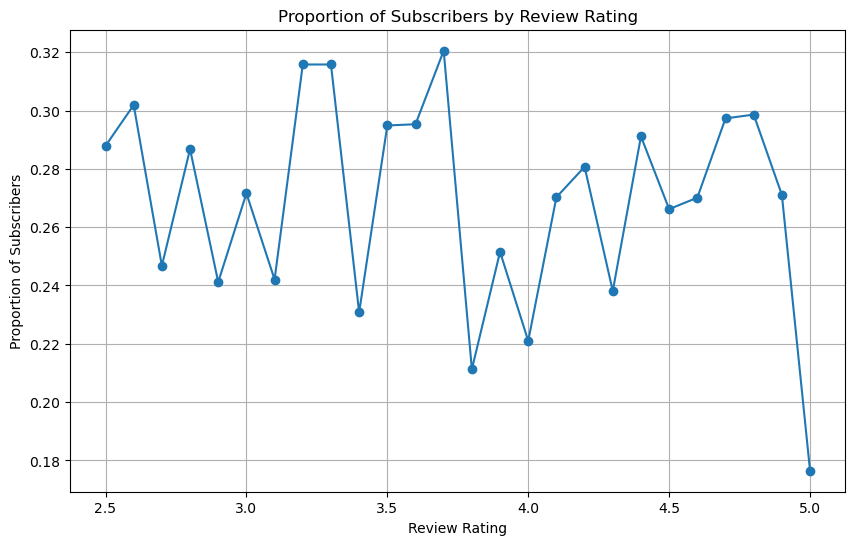

In [309]:
# Calculate the proportion of subscribers for each review rating
proportion_subscribers = data.groupby('Review Rating')['Subscription Status'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
# Plotting the relationship between review ratings and proportion of subscribers
plt.plot(proportion_subscribers['Review Rating'], proportion_subscribers['Subscription Status'], marker='o')
# Adding labels and title
plt.xlabel('Review Rating')
plt.ylabel('Proportion of Subscribers')
plt.title('Proportion of Subscribers by Review Rating')
plt.grid(True)
plt.show()

In [310]:
variables_of_interest = ['Gender', 'Discount Applied', 'Promo Code Used', 'Subscription Status']

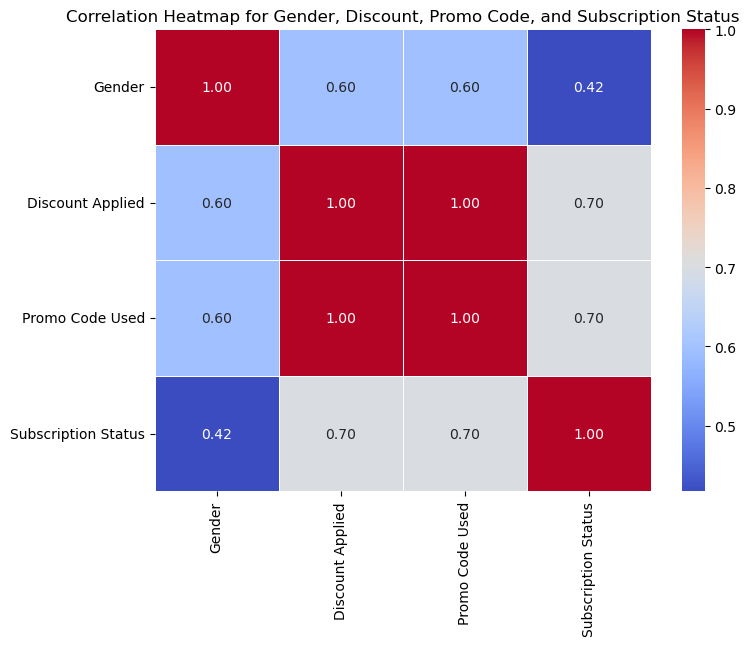

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for selected variables
corr_matrix_subset = data[variables_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Gender, Discount, Promo Code, and Subscription Status')
plt.show()


In [312]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop the 'Gender' column from the dataset
X = data[[ 'Discount Applied','Gender', 'Promo Code Used']]
y = data['Subscription Status'] 
#target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.8256410256410256

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780


Confusion Matrix:
[[422 136]
 [  0 222]]
